In [1]:
import k3d
import numpy as np

points_number = 15
spread_range = 30
positions = spread_range * np.random.random_sample((points_number, 3)) - spread_range / 2
colors = np.random.randint(0, 0xFFFFFF, points_number)

plot = k3d.plot(height=240)
points = k3d.points(positions.astype(np.float32), colors.astype(np.uint32), point_size=3.0, shader='mesh')
plot += points
plot.display()

Output()

In [2]:
import ipywidgets
from IPython import display

# recommended for animations
plot.camera_auto_fit = False
plot.grid_auto_fit = False

speeds = -0.5 * np.sign(positions)
out = ipywidgets.Output()

@plot.yield_screenshots
def coroutine():
    global positions
    for i in range(20):
        positions += speeds
        points.positions = positions.astype(np.float32)
        plot.fetch_screenshot()
        screenshot = yield
        with open('screenshot_{}.png'.format(i), 'wb') as f:
            f.write(screenshot)
        with out:
            print('screenshot_{}.png saved.'.format(i))
    with out:
        print('done.')

coroutine()
print('loop is running in background...')
out

loop is running in background...


Output()

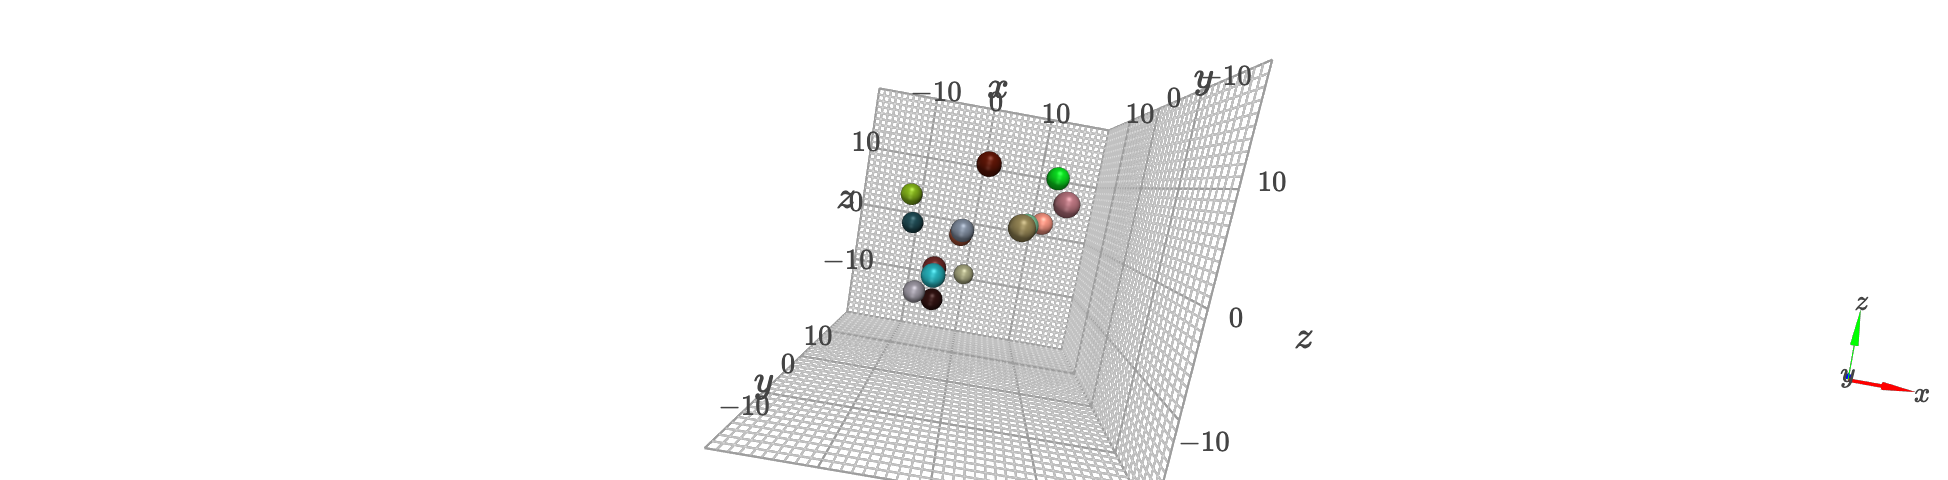

In [7]:
from IPython import display

display.Image('screenshot_9.png')